In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

In [2]:
#load Data

Eth2=pd.read_csv('Eth_Cleaned.csv')

In [3]:
Eth1_fb=Eth2

In [4]:
#Making the Date the index
Eth2=Eth2.set_index('Date')

## Modelling

In [5]:
#Dataset for modelling
Eth_df=Eth2[['Price']]
Eth_df.head()

,Price
Date,
2016-03-10,11.75
2016-03-11,11.95
2016-03-12,12.92
2016-03-13,15.07
2016-03-14,12.50


### a. Feedforward Neural Network

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [7]:
#Convert pandas dataframe to numpy array
eth_np = Eth_df.values
eth_np = eth_np.astype('float32') 

In [8]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
eth_np = scaler.fit_transform(eth_np)

In [9]:
#split into train and test sets, Fisrt 2/3 for training and last 1/3 for testing
train_size = int(len(eth_np) * 0.66)
test_size = len(eth_np) - train_size
train, test = eth_np[0:train_size,:], eth_np[train_size:len(eth_np),:] 

In [10]:
#creates a dataset X for t, t-1, t-2 ... prices and Y for the next (t + 1) prices
def to_sequences(eth_np, seq_size=1):
    x = []
    y = []

    for i in range(len(eth_np)-seq_size-1):
        #print(i)
        window = eth_np[i:(i+seq_size), 0]
        x.append(window)
        y.append(eth_np[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 10 # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))


Shape of training set: (1285, 10)
Shape of test set: (657, 10)


In [11]:
#build the model
#Input dimensions are... (N x seq_size)
print('Build deep model...')
# create and fit dense model
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary()) 

Build deep model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#Fit the model
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=1, epochs=100)

Train on 1285 samples, validate on 657 samples
Epoch 1/100
1285/1285 [==============================] - 0s 173us/step - loss: 0.0024 - acc: 7.7821e-04 - val_loss: 0.0072 - val_acc: 0.0015
Epoch 2/100
1285/1285 [==============================] - 0s 78us/step - loss: 1.3123e-04 - acc: 7.7821e-04 - val_loss: 0.0017 - val_acc: 0.0015
Epoch 3/100
1285/1285 [==============================] - 0s 78us/step - loss: 1.0838e-04 - acc: 7.7821e-04 - val_loss: 0.0016 - val_acc: 0.0015
Epoch 4/100
1285/1285 [==============================] - 0s 73us/step - loss: 9.8923e-05 - acc: 7.7821e-04 - val_loss: 0.0016 - val_acc: 0.0015
Epoch 5/100
1285/1285 [==============================] - 0s 83us/step - loss: 9.1558e-05 - acc: 7.7821e-04 - val_loss: 0.0012 - val_acc: 0.0015
Epoch 6/100
1285/1285 [==============================] - 0s 73us/step - loss: 8.1441e-05 - acc: 7.7821e-04 - val_loss: 0.0013 - val_acc: 0.0015
Epoch 7/100
1285/1285 [==============================] - 0s 65us/step - loss: 7.3571e-05 - a

Epoch 56/100
1285/1285 [==============================] - 0s 50us/step - loss: 3.6107e-05 - acc: 7.7821e-04 - val_loss: 5.9324e-04 - val_acc: 0.0015
Epoch 57/100
1285/1285 [==============================] - 0s 67us/step - loss: 3.6309e-05 - acc: 7.7821e-04 - val_loss: 8.9569e-04 - val_acc: 0.0015
Epoch 58/100
1285/1285 [==============================] - 0s 54us/step - loss: 4.1705e-05 - acc: 7.7821e-04 - val_loss: 6.3931e-04 - val_acc: 0.0015
Epoch 59/100
1285/1285 [==============================] - 0s 71us/step - loss: 3.5638e-05 - acc: 7.7821e-04 - val_loss: 8.1458e-04 - val_acc: 0.0015
Epoch 60/100
1285/1285 [==============================] - 0s 49us/step - loss: 4.2340e-05 - acc: 7.7821e-04 - val_loss: 7.7288e-04 - val_acc: 0.0015
Epoch 61/100
1285/1285 [==============================] - 0s 59us/step - loss: 3.4714e-05 - acc: 7.7821e-04 - val_loss: 8.9653e-04 - val_acc: 0.0015
Epoch 62/100
1285/1285 [==============================] - 0s 56us/step - loss: 3.9128e-05 - acc: 7.7821e-0

In [13]:
# Predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [14]:
# Inverse Transforms
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [15]:
import math
# Calculate Root Mean Squared Error
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22.45 RMSE
Test Score: 118.38 RMSE


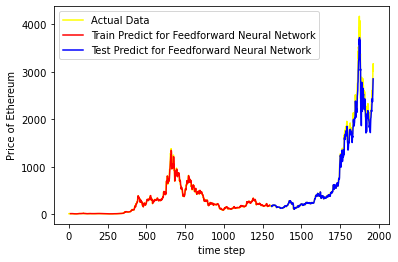

In [16]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(eth_np)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(eth_np)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(eth_np)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(eth_np),label="Actual Data",color='yellow')
plt.plot(trainPredictPlot, label="Train Predict for Feedforward Neural Network",color='red')
plt.plot(testPredictPlot,label="Test Predict for Feedforward Neural Network",color='blue')
plt.legend()
plt.ylabel('Price of Ethereum')
plt.xlabel('time step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.show()

### b. Long short-term memory (LSTM)

In [17]:
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
eth_np = scaler.fit_transform(eth_np)

In [19]:
#split into train and test sets, Fisrt 2/3 for training and last 1/3 for testing
train_size = int(len(eth_np) * 0.66)
test_size = len(eth_np) - train_size
train, test = eth_np[0:train_size,:], eth_np[train_size:len(eth_np),:] 

In [20]:
#creates a dataset X for t, t-1, t-2 ... prices and Y for the next (t + 1) prices
def to_sequences(eth_np, seq_size=1):
    x = []
    y = []

    for i in range(len(eth_np)-seq_size-1):
        #print(i)
        window = eth_np[i:(i+seq_size), 0]
        x.append(window)
        y.append(eth_np[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 10 # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

print("Shape of training set: {}".format(trainX.shape))
print("Shape of test set: {}".format(testX.shape))

Shape of training set: (1285, 10)
Shape of test set: (657, 10)


In [21]:
#The Model

trainX = trainX.reshape((trainX.shape[0], 1, 1, 1, seq_size))
testX = testX.reshape((testX.shape[0], 1, 1, 1, seq_size))

model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, seq_size)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 1, 1, 64)          19200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Fitting the model
model.fit(trainX, trainY, validation_data=(testX, testY),
          verbose=1, epochs=100)

Train on 1285 samples, validate on 657 samples
Epoch 1/100
1285/1285 [==============================] - 1s 949us/step - loss: 8.3089e-04 - val_loss: 0.0021
Epoch 2/100
1285/1285 [==============================] - 0s 156us/step - loss: 1.1141e-04 - val_loss: 0.0014
Epoch 3/100
1285/1285 [==============================] - 0s 156us/step - loss: 9.9742e-05 - val_loss: 0.0012
Epoch 4/100
1285/1285 [==============================] - 0s 169us/step - loss: 8.9438e-05 - val_loss: 0.0011
Epoch 5/100
1285/1285 [==============================] - 0s 156us/step - loss: 8.0935e-05 - val_loss: 0.0013
Epoch 6/100
1285/1285 [==============================] - 0s 156us/step - loss: 8.5654e-05 - val_loss: 9.1273e-04
Epoch 7/100
1285/1285 [==============================] - 0s 156us/step - loss: 7.6235e-05 - val_loss: 7.6212e-04
Epoch 8/100
1285/1285 [==============================] - 0s 156us/step - loss: 6.5393e-05 - val_loss: 6.9621e-04
Epoch 9/100
1285/1285 [==============================] - 0s 156us/ste

1285/1285 [==============================] - 0s 148us/step - loss: 4.2632e-05 - val_loss: 0.0010
Epoch 74/100
1285/1285 [==============================] - 0s 156us/step - loss: 3.6423e-05 - val_loss: 0.0014
Epoch 75/100
1285/1285 [==============================] - 0s 145us/step - loss: 3.7883e-05 - val_loss: 7.4050e-04
Epoch 76/100
1285/1285 [==============================] - 0s 155us/step - loss: 3.5095e-05 - val_loss: 0.0014
Epoch 77/100
1285/1285 [==============================] - 0s 144us/step - loss: 3.4018e-05 - val_loss: 0.0013
Epoch 78/100
1285/1285 [==============================] - 0s 144us/step - loss: 3.5250e-05 - val_loss: 6.6117e-04
Epoch 79/100
1285/1285 [==============================] - 0s 156us/step - loss: 3.2186e-05 - val_loss: 9.0831e-04
Epoch 80/100
1285/1285 [==============================] - 0s 153us/step - loss: 4.6273e-05 - val_loss: 0.0011
Epoch 81/100
1285/1285 [==============================] - 0s 154us/step - loss: 3.7402e-05 - val_loss: 8.4491e-04
Epoch 8

In [23]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [24]:
# invert predictions back to prescaled values
#This is to compare with original input values

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.04 RMSE


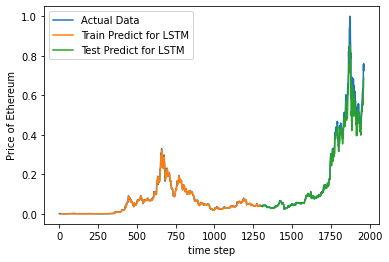

In [25]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot = np.empty_like(eth_np)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(eth_np)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(eth_np)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(eth_np),label="Actual Data")
plt.plot(trainPredictPlot,label="Train Predict for LSTM")
plt.plot(testPredictPlot,label="Test Predict for LSTM")
plt.legend()
plt.ylabel('Price of Ethereum')
plt.xlabel('time step' )
plt.show()

